<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-(to-run-before-anything-else)" data-toc-modified-id="Imports-(to-run-before-anything-else)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports (<strong><em>to run before anything else</em></strong>)</a></span></li><li><span><a href="#Testing-generation-of-OAM-images" data-toc-modified-id="Testing-generation-of-OAM-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testing generation of OAM images</a></span><ul class="toc-item"><li><span><a href="#Profiles-of-OAM-states-with-$p=0$-and-$m=-5,-4,...,4,5$" data-toc-modified-id="Profiles-of-OAM-states-with-$p=0$-and-$m=-5,-4,...,4,5$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Profiles of OAM states with $p=0$ and $m=-5,-4,...,4,5$</a></span></li><li><span><a href="#Profiles-of-OAM-states-with-$p=1$-and-$m=-5,-4,...,4,5$" data-toc-modified-id="Profiles-of-OAM-states-with-$p=1$-and-$m=-5,-4,...,4,5$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Profiles of OAM states with $p=1$ and $m=-5,-4,...,4,5$</a></span></li><li><span><a href="#Superpositions-$\lvert-0\rangle+-e^{i\varphi}\lvert-m\rangle$-for-various-$m$" data-toc-modified-id="Superpositions-$\lvert-0\rangle+-e^{i\varphi}\lvert-m\rangle$-for-various-$m$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Superpositions $\lvert 0\rangle+ e^{i\varphi}\lvert m\rangle$ for various $m$</a></span></li><li><span><a href="#Adding-noise-to-the-images" data-toc-modified-id="Adding-noise-to-the-images-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Adding noise to the images</a></span></li><li><span><a href="#PCA-on-OAM-states" data-toc-modified-id="PCA-on-OAM-states-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>PCA on OAM states</a></span></li></ul></li><li><span><a href="#Testing-generation-of-VVB-images" data-toc-modified-id="Testing-generation-of-VVB-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Testing generation of VVB images</a></span></li><li><span><a href="#Apply-PCA-+-SVC-to-classify-VVBs" data-toc-modified-id="Apply-PCA-+-SVC-to-classify-VVBs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Apply PCA + SVC to classify VVBs</a></span></li><li><span><a href="#Generate-and-save-simulated-images-to-file" data-toc-modified-id="Generate-and-save-simulated-images-to-file-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generate and save simulated images to file</a></span><ul class="toc-item"><li><span><a href="#Generate-noisy-images-and-recover-the-resultant-Bloch-sphere" data-toc-modified-id="Generate-noisy-images-and-recover-the-resultant-Bloch-sphere-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Generate noisy images and recover the resultant Bloch sphere</a></span></li><li><span><a href="#More-then-two-dimensional-spaces-(still-simulated-images)" data-toc-modified-id="More-then-two-dimensional-spaces-(still-simulated-images)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>More then two-dimensional spaces (still simulated images)</a></span></li><li><span><a href="#Other-stuff?" data-toc-modified-id="Other-stuff?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Other stuff?</a></span></li></ul></li><li><span><a href="#Load-and-classify-experimental-data" data-toc-modified-id="Load-and-classify-experimental-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load and classify experimental data</a></span><ul class="toc-item"><li><span><a href="#Check-accuracy-of-SVC-on-reduced-space,-using-all-the-images-for-training" data-toc-modified-id="Check-accuracy-of-SVC-on-reduced-space,-using-all-the-images-for-training-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Check accuracy of SVC on reduced space, using all the images for training</a></span></li><li><span><a href="#Check-accuracy-of-SVC-on-reduced-space,-using-half-of-the-given-images" data-toc-modified-id="Check-accuracy-of-SVC-on-reduced-space,-using-half-of-the-given-images-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Check accuracy of SVC on reduced space, using half of the given images</a></span></li><li><span><a href="#Direct-regression-using-principal-components" data-toc-modified-id="Direct-regression-using-principal-components-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Direct regression using principal components</a></span></li><li><span><a href="#Other-sections" data-toc-modified-id="Other-sections-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Other sections</a></span></li></ul></li><li><span><a href="#Taira-stuff" data-toc-modified-id="Taira-stuff-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Taira stuff</a></span></li></ul></div>

# Imports (***to run before anything else***)

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import pickle
import scipy
import scipy.special
import itertools
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import collections
from collections import OrderedDict
import glob
import progressbar
import qutip

import sklearn
import sklearn.decomposition
import skimage
import skimage.transform

import plotly
import plotly.offline
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

if './src' not in sys.path:
    sys.path.append('./src')
import src.vector_vortex_beams as VVB
import utils
from src.utils import abs2, borderless_imshow_save, imshow_intensities
import data_files_utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Camera resolution
# camera_width = 1024
# camera_height = 768
camera_width = 300
camera_height = 300

Y, X = np.meshgrid(
    np.linspace(-camera_height / 2, camera_height / 2, num=camera_height),
    np.linspace(-camera_width / 2, camera_width / 2, num=camera_width)
)

reference_w0 = 50

# Testing generation of OAM images

Here we test the functions to generate and visualise OAM states (no polarisation involved at this stage).

## Profiles of OAM states with $p=0$ and $m=-5,-4,...,4,5$

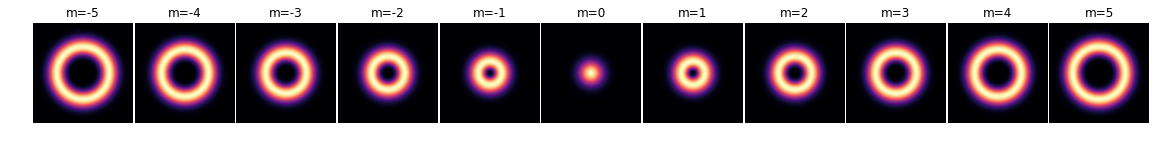

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(20, 6))
for ax, m in zip(axs, np.arange(-5, 6)):
    amps = VVB.LaguerreGauss(X, Y, p=0, m=m, w0=reference_w0)
    ax.axis('off'); ax.set_title('m={}'.format(m))
    utils.imshow_intensities(amps, ax=ax)
fig.subplots_adjust(hspace=0, wspace=.02)

## Profiles of OAM states with $p=1$ and $m=-5,-4,...,4,5$

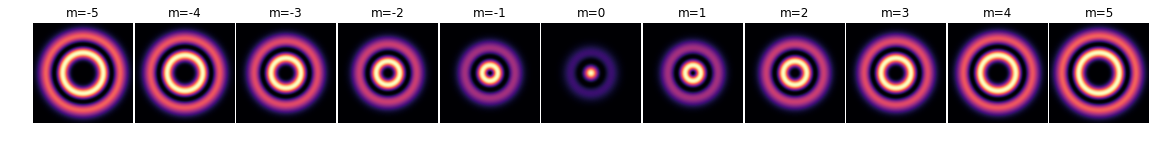

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(20, 6))
for ax, m in zip(axs, np.arange(-5, 6)):
    amps = VVB.LaguerreGauss(X, Y, p=1, m=m, w0=reference_w0)
    ax.axis('off'); ax.set_title('m={}'.format(m))
    utils.imshow_intensities(amps, ax=ax)
fig.subplots_adjust(hspace=0, wspace=.02)

## Superpositions $\lvert 0\rangle+ e^{i\varphi}\lvert m\rangle$ for various $m$

Superpositions $\lvert 0\rangle+ \lvert m\rangle$ for $m=-4,...,4$

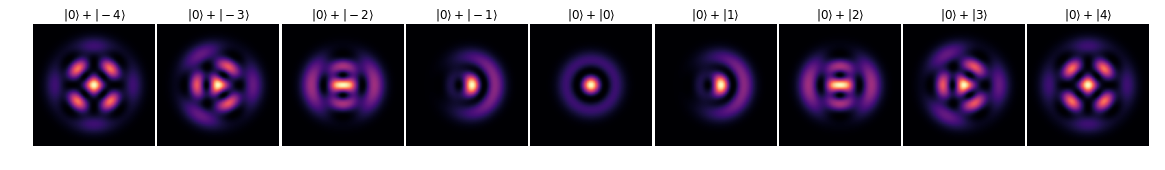

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(20, 6))
for ax, m in zip(axs, np.arange(-4, 5)):
    amps = VVB.LaguerreGauss(X, Y, p=1, m=0, w0=reference_w0) + VVB.LaguerreGauss(X, Y, p=1, m=m, w0=reference_w0)
    ax.axis('off'); ax.set_title(r'$| 0\rangle + | {}\rangle$'.format(m))
    utils.imshow_intensities(amps, ax=ax)
fig.subplots_adjust(hspace=0, wspace=.02)

Superpositions $\lvert 0\rangle+ i \lvert m\rangle$ for $m=-4,...,4$ (same as above but with $\lvert0\rangle+\lvert k\rangle$ rotated of $\pi/2^k$ degrees?). Let's also add $20\%$ (of the total range of intensities in each image) of white noise on the intensities, just because it looks cool.

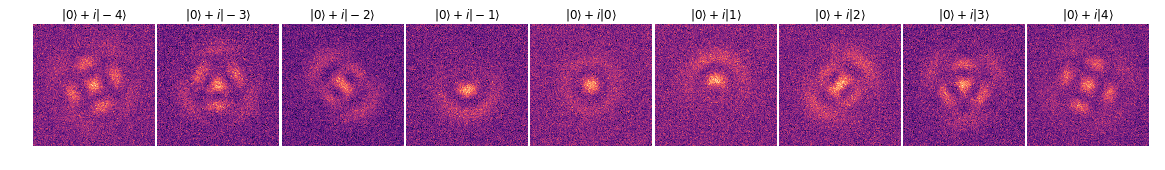

In [114]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(20, 6))
for ax, m in zip(axs, np.arange(-4, 5)):
    amps = VVB.LaguerreGauss(X, Y, p=1, m=0, w0=reference_w0) + 1j * VVB.LaguerreGauss(X, Y, p=1, m=m, w0=reference_w0)
    ax.axis('off'); ax.set_title(r'$| 0\rangle + i| {}\rangle$'.format(m))
    ints = utils.add_noise_to_array(abs2(amps), noise_level=0.2)
    utils.imshow_intensities(intensities=ints, ax=ax)
fig.subplots_adjust(hspace=0, wspace=.02)

## Adding noise to the images

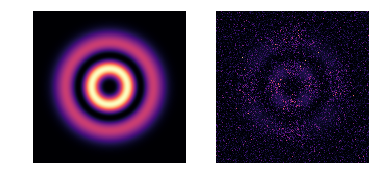

In [5]:
fig, axs = plt.subplots(ncols=2)

data = VVB.LaguerreGauss(X, Y, p=1, m=2, w0=reference_w0)
imshow_intensities(data, ax=axs[0])
data = utils.add_noise_to_array(data, noise_level=0.3)
imshow_intensities(data, ax=axs[1])

## PCA on OAM states

In [143]:
# generate the tuples (p, (m1, m2)), with p fixed and (m1, m2) changing
tuples_to_generate = []
p_list = [0, 1, 2]
m_list = [0, 1, 2, 3, 4, 5]
for p in p_list:
    for m in m_list:
        tuples_to_generate.append([(p, m)])
tuples_to_generate.append([(1, 1), (1, 2)])
tuples_to_generate.append([(1, 1), (1, 3)])
tuples_to_generate.append([(1, 1), (1, 4)])
# actually generate, reduce, and classify the data
OAM_dataset = VVB.OAMDataset(X=X, Y=Y, w0=reference_w0)
OAM_dataset.generate_data(parameters=tuples_to_generate, num_samples=20, noise_level=0.1,
                          polarization_state='sequential phases', monitor='progressbar')
OAM_dataset.apply_PCA(n_components=20, svd_solver='randomized', whiten=True)
OAM_dataset.fit_SVM(gamma='auto')

100% (21 of 21) |########################| Elapsed Time: 0:00:10 Time:  0:00:10


Let's see what the principal vectors found by the algorithm look like:

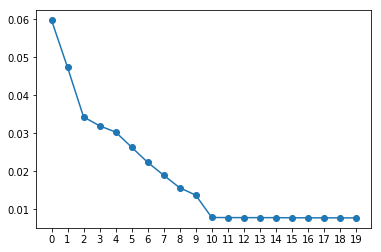

In [144]:
plt.plot(OAM_dataset.pca.singular_values_, 'o-'); plt.xticks(np.arange(20));

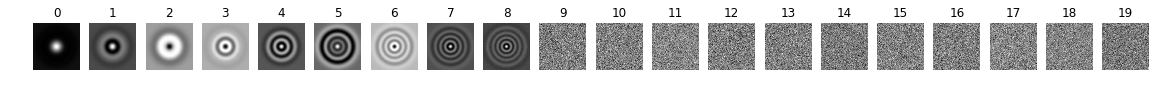

In [21]:
fig, axs = plt.subplots(ncols=20, figsize=(20, 4))
for idx, ax in enumerate(axs):
    ax.imshow(OAM_dataset.pca.components_[idx].reshape((300, 300)), cmap='gray');
    ax.axis('off')
    ax.set_title(idx)

In [198]:
pca.singular_values_

array([0.11425167, 0.07320407, 0.0610202 , 0.05043067, 0.04326235,
       0.04136676, 0.03534813, 0.03210652, 0.02961036, 0.0258944 ,
       0.0230528 , 0.02009286, 0.01717111, 0.01713464, 0.0170599 ,
       0.01703408, 0.01702156, 0.01698691, 0.01692598, 0.01686701])

We see patterns only until a certain point, while the rest seems to be just noise. Interestingly, this is not clearly reflected in the corresponding singular values.
An interesting question might be: how does the number of principal components displaying a noticeable pattern vary with the number of classes using for the training data?

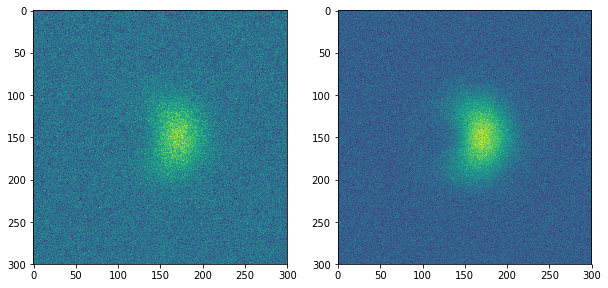

In [203]:
probs = dataset[list(dataset)[4]][20]
funneled_probs = pca.inverse_transform(pca.transform(probs[None, :]))

_, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].imshow(probs.reshape(300, 300))
axs[1].imshow(funneled_probs.reshape(300, 300))

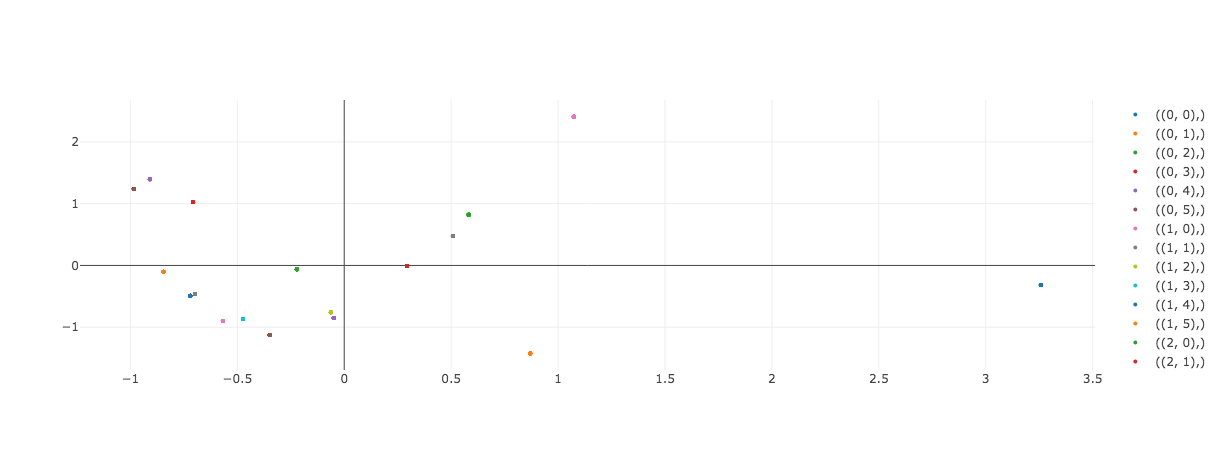

In [36]:
import plotly
import plotly.offline
import plotly.graph_objs as go

traces = []
for idx, label_name in enumerate(OAM_dataset.labels_names):
    reduced_data = OAM_dataset.dataset[np.array(OAM_dataset.labels) == idx]
    reduced_data = OAM_dataset.pca.transform(reduced_data)[:, :2]
    traces.append(go.Scatter(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        mode='markers',
        name=str(label_name),
        marker=dict(size=4)
    ))

plotly.offline.iplot(traces)

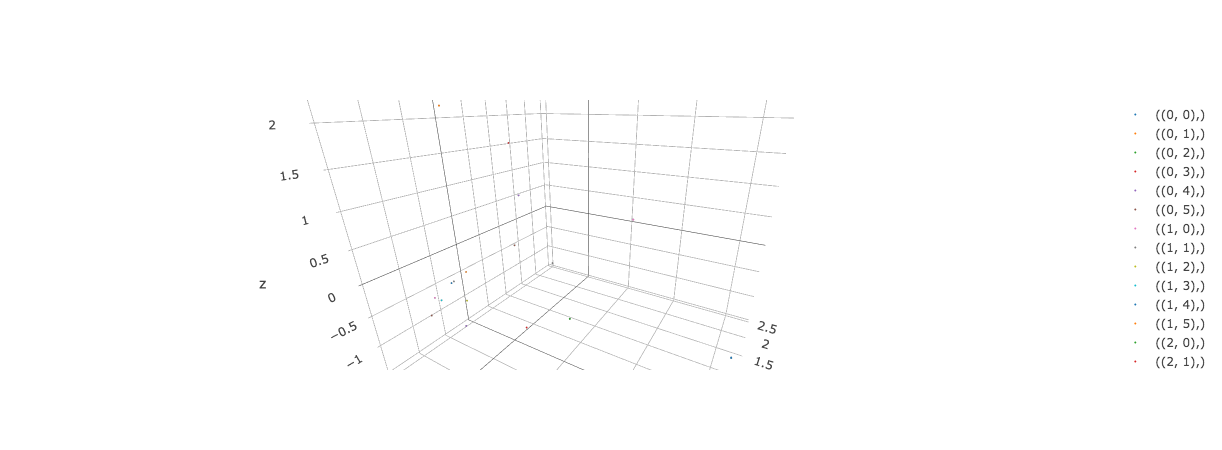

In [33]:
import plotly
import plotly.offline
import plotly.graph_objs as go

traces = []
for idx, label_name in enumerate(OAM_dataset.labels_names):
    reduced_data = OAM_dataset.dataset[np.array(OAM_dataset.labels) == idx]
    reduced_data = OAM_dataset.pca.transform(reduced_data)[:, :3]
    traces.append(go.Scatter3d(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        z=reduced_data[:, 2],
        mode='markers',
        name=str(label_name),
        marker=dict(size=1)
    ))

plotly.offline.iplot(traces)

Generate a bunch of images for classification of different basis states

# Testing generation of VVB images

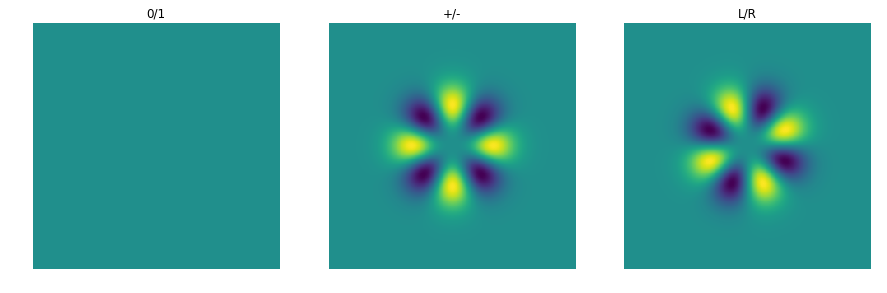

In [2]:
stokes_pars = VVB.vector_vortex_stokes_pars(X, Y, p=0, m_pair=[-2, 2], w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2))
stokes_pars = utils.make_into_rgb_format(stokes_pars)

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
utils.imshow_stokes_probs(stokes_pars, axs=axs, imshow_opts=dict(vmin=stokes_pars.min(), vmax=stokes_pars.max()), show_axis=False);
# fig.colorbar(axs[1].images[0], ax=axs.ravel().tolist());

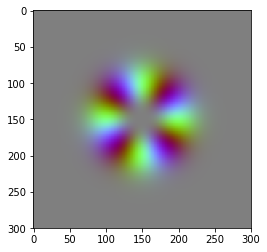

In [43]:
stokes_pars = VVB.vector_vortex_stokes_pars(X, Y, p=0, m_pair=[-2, 2], w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2))
plt.imshow(utils.make_into_rgb_format(stokes_pars));

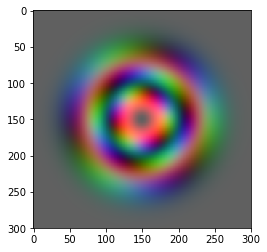

In [238]:
stokes_pars = VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=[1, 4], w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2))
plt.imshow(utils.make_into_rgb_format(stokes_pars));

# Apply PCA + SVC to classify VVBs

In [80]:
# generate the tuples (p, (m1, m2)), with p fixed and (m1, m2) changing
p = 1
tuples_to_generate = []
m_list = [-5, -3, -1, 1, 3, 5]
for (m, n) in list(itertools.combinations_with_replacement(m_list, r=2)):
    if (p, (-m, -n)) not in tuples_to_generate:
        tuples_to_generate.append((p, (m, n)))

# actually generate, reduce, and classify the data
dataset = VVB.VVBDataset(X=X, Y=Y, w0=reference_w0)
dataset.generate_data(parameters=tuples_to_generate, num_samples=100, noise_level=0.1, polarization_state='sequential phases', monitor=True)
dataset.apply_PCA(n_components=20, svd_solver='randomized', whiten=True)
dataset.fit_SVM(gamma='scale')

100%|██████████| 18/18 [01:22<00:00,  4.53s/it]


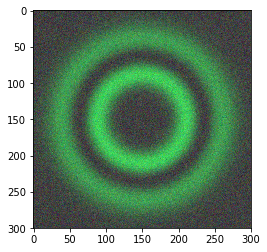

In [106]:
plt.imshow(utils.rescale_array_values(np.transpose(dataset.dataset[3].reshape((3, 300, 300)), [1, 2, 0]), [0, 255]).astype(np.uint8))

Save the generated images as png files:

In [107]:
for label_idx, label_name in enumerate(dataset.labels_names):
    path = './images/noise0.1/{}'.format(label_name)
    path = path.replace(' ', '')
    os.makedirs(path, exist_ok=True)
    data_per_label = dataset.dataset[np.array(dataset.labels) == label_idx]
    for image_idx, image_data in enumerate(data_per_label):
        image_data = image_data.reshape((3, 300, 300))
        image_data = np.transpose(image_data, [1, 2, 0])
        image_data = utils.rescale_array_values(image_data, [0, 255]).astype(np.uint8)
        filename = os.path.join(path, '({:03}).png'.format(image_idx))
        utils.borderless_imshow_save(image_data, outputname=filename)

In [9]:
# import pickle
# import copy
# dataset_to_save = copy.deepcopy(dataset)
# del dataset_to_save.dataset
# with open('trained_dataset_pca+svc_p1_noice0.01.pickle', 'wb') as fp:
#     pickle.dump(dataset_to_save, fp)

Load and show an image loaded from file:

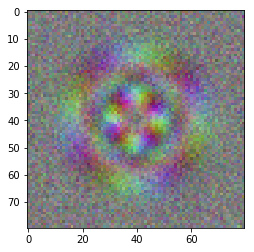

In [108]:
import glob
filenames = glob.glob('./images/noise0.1/**/*.png', recursive=True)
images = np.zeros(shape=(len(filenames), 80, 80, 3))
for idx, filename in enumerate(filenames):
    images[idx] = plt.imread(filename)[:, :, :3]
plt.imshow(images[0]);

Show first principal components found by the PCA.

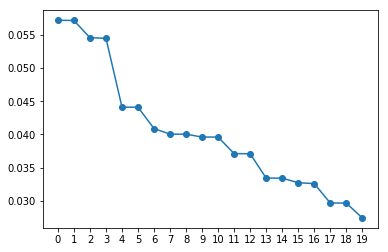

In [109]:
plt.plot(dataset.pca.singular_values_, 'o-')
plt.xticks(np.arange(20));

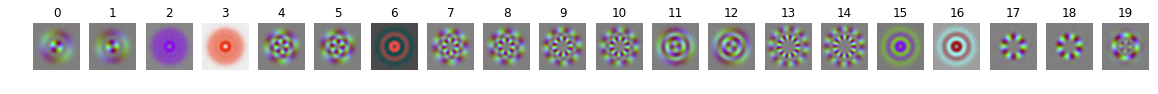

In [110]:
fig, axs = plt.subplots(ncols=20, figsize=(20, 4))
for idx, ax in enumerate(axs):
    ax.imshow(utils.make_into_rgb_format(dataset.pca.components_[idx].reshape((3, 300, 300))));
    ax.axis('off')
    ax.set_title(idx)

Ten effective dimensions are already enough to reproduce with good accuracy even more complex features:

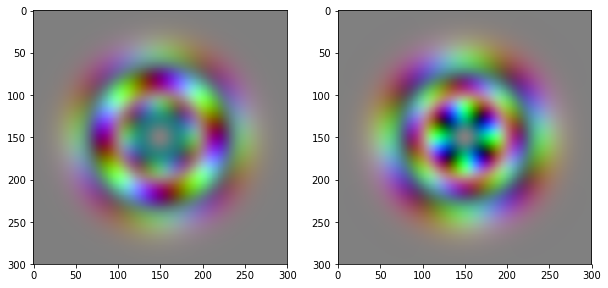

In [78]:
data = dataset.dataset[200]
img = data.reshape((3, 300, 300))
filtered_img = dataset.cut_feature_space_components(data[None, :], num_dimensions=10).reshape((3, 300, 300))

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].imshow(utils.make_into_rgb_format(img))

axs[1].imshow(utils.make_into_rgb_format(filtered_img));

Test classifier on training data

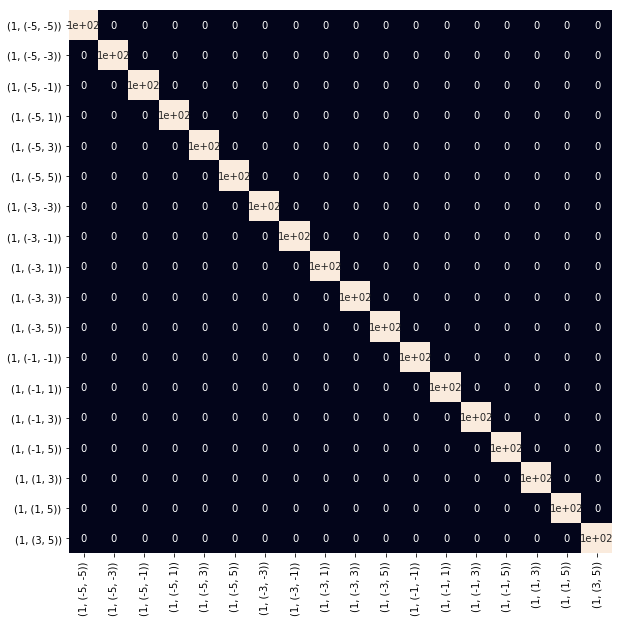

In [83]:
predicted_features = VVB.accuracies_from_predictions(
    true_labels=np.array(dataset.labels),
    predicted_labels=dataset.reduce_and_classify(dataset.dataset),
    labels_names=dataset.labels_names
)

_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(
    data=list(predicted_features.values()), ax=ax,
    annot=True, square=True, cbar=False,
    xticklabels=predicted_features.keys(), yticklabels=predicted_features.keys()
);

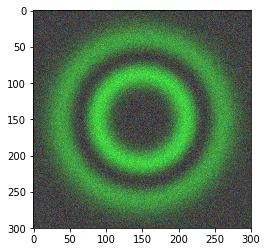

In [108]:
img = dataset.dataset[np.argwhere(dataset.labels == np.array(0))[0][0]].reshape((3, 300, 300))
plt.imshow(utils.make_into_rgb_format(img));

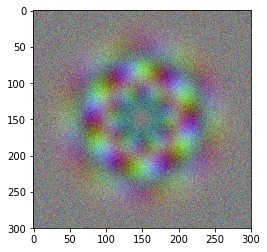

In [110]:
img = dataset.dataset[np.argwhere(dataset.labels == np.array(3))[0][0]].reshape((3, 300, 300))
plt.imshow(utils.make_into_rgb_format(img));

Test classification on a freshly generated dataset:

100%|██████████| 18/18 [00:34<00:00,  1.81s/it]


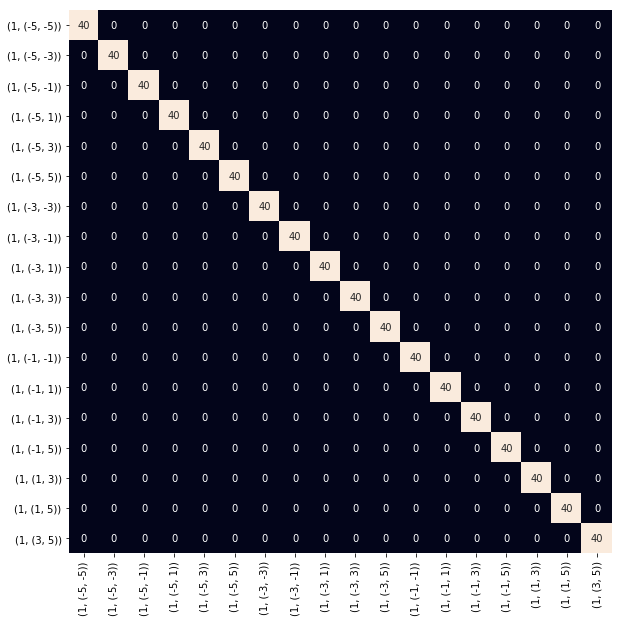

In [84]:
test_dataset = VVB.VVBDataset(X=X, Y=Y, w0=reference_w0)
test_dataset.generate_data(parameters=tuples_to_generate, num_samples=40, noise_level=0.1, polarization_state='random phases', monitor=True)

predicted_features = VVB.accuracies_from_predictions(
    true_labels=np.array(test_dataset.labels),
    predicted_labels=dataset.reduce_and_classify(test_dataset.dataset),
    labels_names=dataset.labels_names
)

_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(
    data=list(predicted_features.values()), ax=ax,
    annot=True, square=True, cbar=False,
    xticklabels=predicted_features.keys(), yticklabels=predicted_features.keys()
);

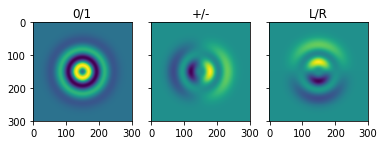

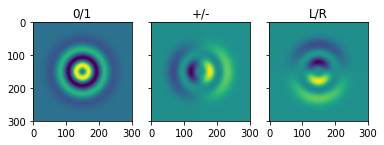

In [178]:
utils.imshow_stokes_probs(VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=(1, 2), w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2)))

utils.imshow_stokes_probs(VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=(-1, -2), w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2)));

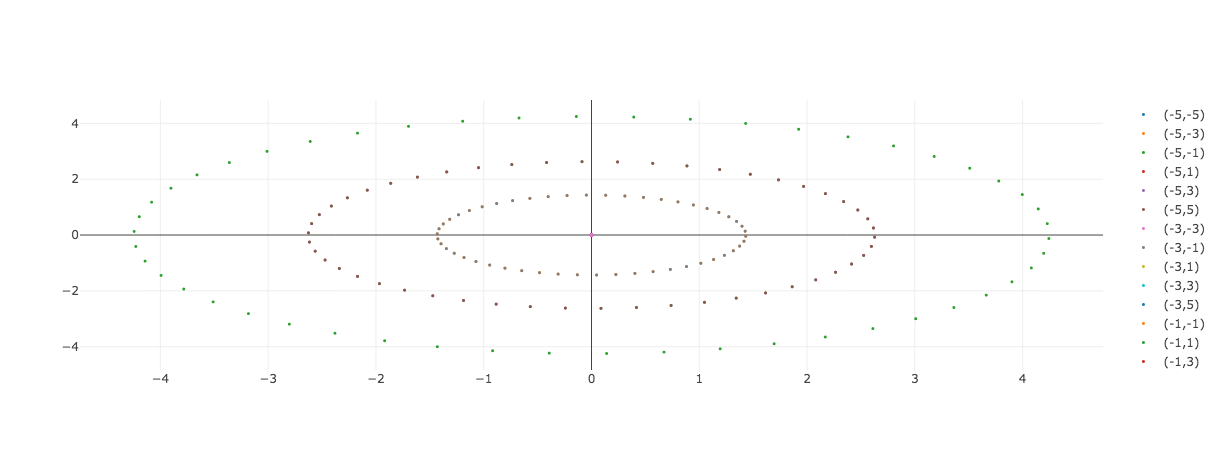

In [197]:
traces = []
for name, data in dataset.items():
    reduced_data = pca.transform(data)[:, :2]
    traces.append(go.Scatter(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
#         z=reduced_data[:, 2],
        mode='markers',
        name=name,
        marker=dict(size=3)
    ))

plotly.offline.iplot(traces)

In [198]:
import plotly
import plotly.offline
import plotly.graph_objs as go

reduced_data = pca.transform(data)[:, :3]
colors = ['blue', 'red', 'green', 'purple']
traces = []
for name, data in dataset.items():
    reduced_data = pca.transform(data)
    traces.append(go.Scatter3d(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        z=reduced_data[:, 2],
        mode='markers',
        name=name,
        marker=dict(size=2)
    ))

plotly.offline.plot(traces, filename='stargate.html')

'file:///home/lk/Documents/docs/research/OAM_2016/CNN-for-VVB/stargate.html'

# Generate and save simulated images to file

In [394]:
# generate the tuples (p, (m1, m2)), with p fixed and (m1, m2) changing
p = 1
tuples_to_generate = []
m_list = [-3, -1, 1, 3]
for (m, n) in list(itertools.combinations_with_replacement(m_list, r=2)):
    if (p, (-m, -n)) not in tuples_to_generate:
        tuples_to_generate.append((p, (m, n)))
# actually generate, reduce, and classify the data
import data_files_utils
data_files_utils.generate_VVB_superpositions_dataset(
    pars_to_generate=tuples_to_generate, num_samples_per_class=100, noise_level=0.1,
    data_dir=os.path.join('data', 'simulated_noise0.1_onlyphi_bigdataset'),
    X=X, Y=Y, w0=reference_w0, polarization_state='sequential phases')
# data_generation_utils.generate_VVB_superpositions_dataset(
#     pars_to_generate=tuples_to_generate, num_samples_per_class=40, noise_level=0.2,
#     data_dir=os.path.join('data', 'simulated_noise0.2_onlyphi'),
#     X=X, Y=Y, w0=reference_w0
# )

In [35]:
tuples_to_generate = [(1, (1, 2))]
# actually generate, reduce, and classify the data
import data_files_utils
data_files_utils.generate_VVB_superpositions_dataset(
    pars_to_generate=tuples_to_generate, num_samples_per_class=100, noise_level=0.1,
    data_dir=os.path.join('data', 'single_qubit_test_fuc'), output_shape=(100, 100),
    X=X, Y=Y, w0=reference_w0, polarization_state='uniform random')

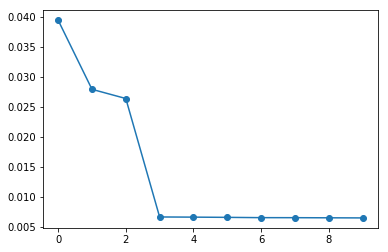

In [54]:
dataset = VVB.VVBDataset(X=X, Y=Y, w0=reference_w0)
dataset.generate_data(parameters=[(1, (1, 2))],
                      num_samples=100,
                      noise_level=0.1,
                      polarization_state='uniform random')
pca = sklearn.decomposition.PCA(n_components=10)
pca.fit(dataset.dataset)
plt.plot(pca.singular_values_, 'o-')

15.8932407852


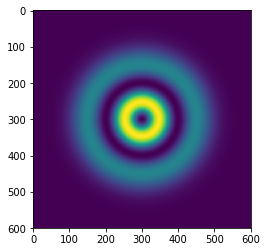

In [46]:
def _():
    Y, X = np.meshgrid(np.linspace(-150, 150, 600), np.linspace(-150, 150, 600))
    print(abs2(np.vdot(VVB.LaguerreGauss(X, Y, w0=reference_w0, p=1, m=1), VVB.LaguerreGauss(X, Y, w0=reference_w0, p=1, m=1))))
    plt.imshow(abs2(VVB.LaguerreGauss(X, Y, w0=reference_w0, p=1, m=1)))
_()

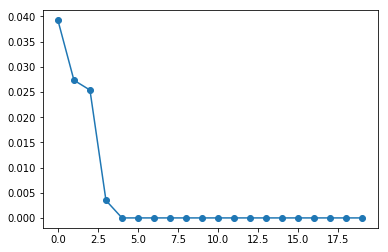

In [22]:
foo = sklearn.decomposition.PCA(n_components=20)
foo.fit(dataset.dataset)
plt.plot(foo.singular_values_, 'o-')

In [433]:
np.vdot(dataset.dataset[0], dataset.dataset[0])

2.8714543187083705e-05

In [64]:
import data_files_utils
foo = data_files_utils.ImageDataFolder(os.path.join('data', 'simulated_noise0.1_onlyphi_rndphases'))
foo.class_dirs

['data/simulated_noise0.1_onlyphi_rndphases/m-5-5/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-5-3/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-5-1/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-5+1/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-5+3/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-5+5/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-3-3/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-3-1/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-3+1/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-3+3/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-3+5/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-1-1/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-1+1/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-1+3/',
 'data/simulated_noise0.1_onlyphi_rndphases/m-1+5/',
 'data/simulated_noise0.1_onlyphi_rndphases/m+1+3/',
 'data/simulated_noise0.1_onlyphi_rndphases/m+1+5/',
 'data/simulated_noise0.1_onlyphi_rndphases/m+3+5/']

## Generate noisy images and recover the resultant Bloch sphere

Generate noisy images and recover the resultant Bloch sphere for states of the form $c_0\lvert\uparrow,m=1\rangle+c_1\lvert \downarrow,m=2\rangle$, fixing $p=1$.

In [37]:
tuples_to_generate = [(1, (1, 2))]
data_files_utils.generate_VVB_superpositions_dataset(
    pars_to_generate=tuples_to_generate, num_samples_per_class=100, noise_level=0.1,
    data_dir=os.path.join('data', 'single_qubit_uniform_polarization'), output_shape=(100, 100),
    X=X, Y=Y, w0=reference_w0, polarization_state='uniform random')

The linear PCA here clearly shows that the data is effectively three-dimensional, and returns the three directions along which the original Bloch sphere has been mapped:

[55.12716449 40.25462401 35.54091235  2.72520188  2.71940781]


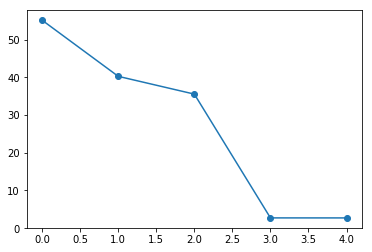

In [65]:
data_dir = os.path.join('data', 'single_qubit_uniform_polarization')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=5, output_shape=(100, 100))
print(pca.singular_values_)
plt.plot(pca.singular_values_, 'o-');

Display the first five principal component for the same data as above. Clearly, only the first three directions carry meaningful information, while the rest is picking up the noise.

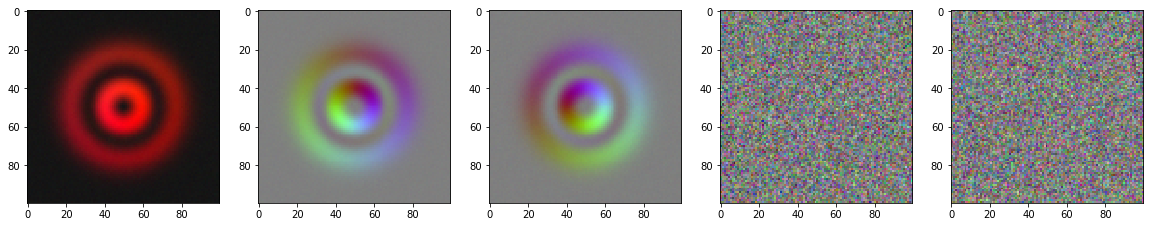

In [66]:
data_dir = os.path.join('data', 'single_qubit_uniform_polarization')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=5, output_shape=(100, 100))
fig, axs = plt.subplots(ncols=5, figsize=(20, 20))
for idx, component in enumerate(pca.components_):
    img = component.reshape((100, 100, 3))
    img = utils.rescale_array_values(img, [0, 1])
    axs[idx].imshow(img)

Same as above but downsampling to $50\times 50$ pixel images. There are no significant changes

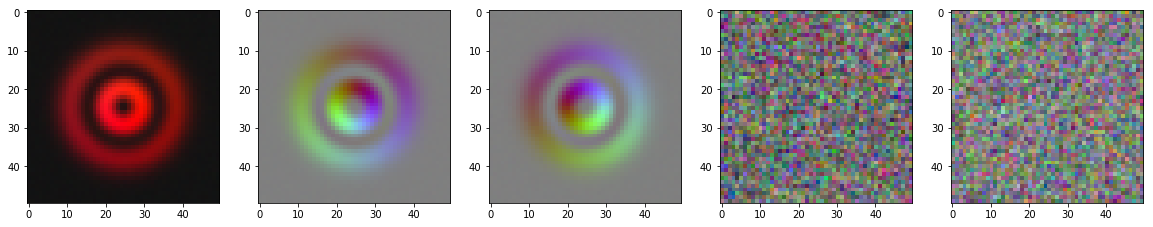

In [67]:
data_dir = os.path.join('data', 'single_qubit_uniform_polarization')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=5, output_shape=(50, 50))
fig, axs = plt.subplots(ncols=5, figsize=(20, 20))
for idx, component in enumerate(pca.components_):
    img = component.reshape((50, 50, 3))
    img = utils.rescale_array_values(img, [0, 1])
    axs[idx].imshow(img)

Show data in the reduced three dimensions:

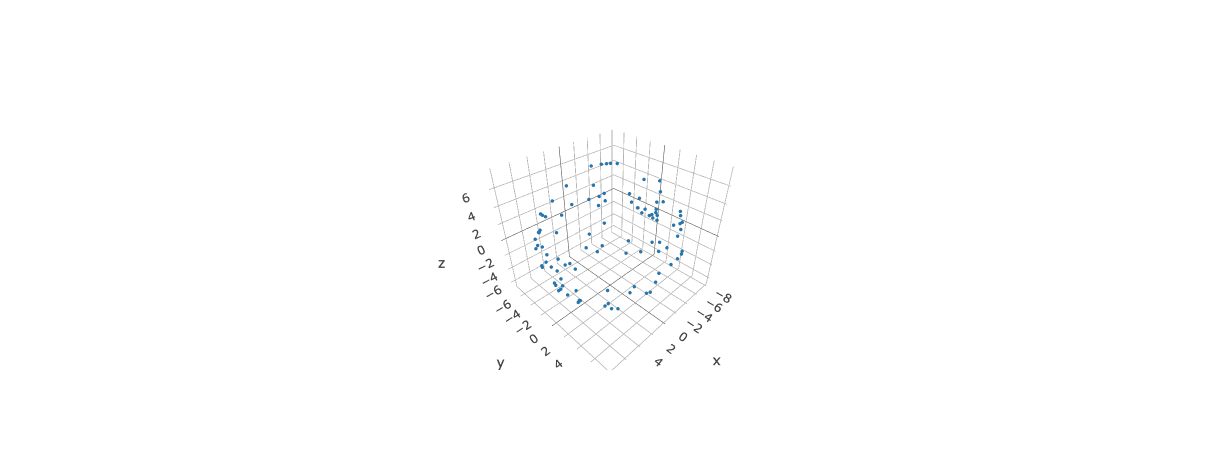

In [69]:
data_dir = os.path.join('data', 'single_qubit_uniform_polarization')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=3, output_shape=(100, 100))
reduced_images = data_files_utils.load_and_reduce_images_in_dir(data_dir=data_dir, reducer=pca, output_shape=(100, 100))

traces = [go.Scatter3d(
    x=reduced_images[:, 0], y=reduced_images[:, 1], z=reduced_images[:, 2],
    mode='markers', marker=dict(size=2)
)]
plotly.offline.iplot(traces)

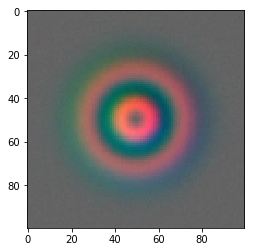

In [79]:
data_dir = os.path.join('data', 'single_qubit_uniform_polarization')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=3, output_shape=(100, 100))
img = utils.rescale_array_values(
    pca.inverse_transform([[0, 1, 0]]).reshape((100, 100, 3)), range_=[0, 1]
)
plt.imshow(img)

## More then two-dimensional spaces (still simulated images)

In [105]:
tuples_to_generate = [(1, (1, 2))]
tuples_to_generate += [(1, (2, 1))]
data_dir = os.path.join('data', 'simulated_m+1+2_and_m+2+1')
data_files_utils.generate_VVB_superpositions_dataset(
    pars_to_generate=tuples_to_generate, num_samples_per_class=100, noise_level=0.1,
    data_dir=data_dir, output_shape=(100, 100),
    X=X, Y=Y, w0=reference_w0, polarization_state='uniform random')

[75.63251901 37.05639272 36.79301673 34.08062655 33.54663338 32.49469221
  2.56833723  2.56709694  2.56021096  2.54869733  2.5462754   2.54459956
  2.53466038  2.52745541  2.524077    2.51985489  2.5157736   2.5127416
  2.5036476   2.49863431]


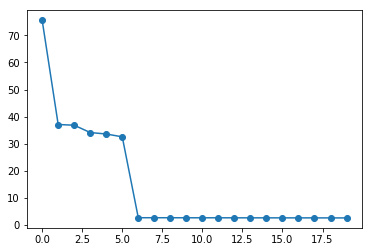

In [111]:
data_dir = os.path.join('data', 'simulated_m+1+2_and_m+2+1')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=20, output_shape=(100, 100))
print(pca.singular_values_)
plt.plot(pca.singular_values_, 'o-');

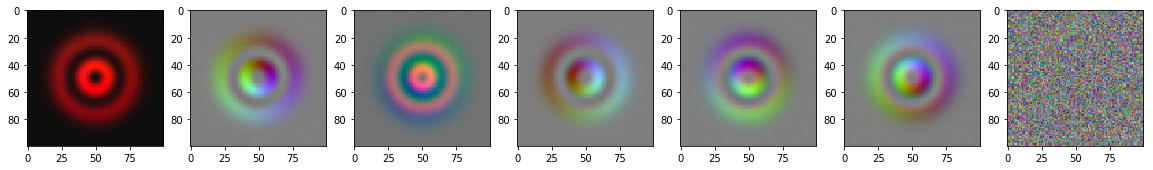

In [112]:
data_dir = os.path.join('data', 'simulated_m+1+2_and_m+2+1')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=7, output_shape=(100, 100))
fig, axs = plt.subplots(ncols=7, figsize=(20, 20))
for idx, component in enumerate(pca.components_):
    img = component.reshape((100, 100, 3))
    img = utils.rescale_array_values(img, [0, 1])
    axs[idx].imshow(img)

[74.93720683 36.62805206 33.319263   27.16460245 25.05239337 23.82386177
  2.76300754  2.73732458  2.72206303  2.71313226]


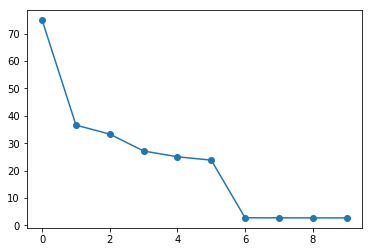

In [116]:
# tuples_to_generate = [(1, (1, 2))]
# tuples_to_generate += [(1, (1, 4))]
# data_dir = os.path.join('data', 'simulated_m+1+2_and_m+1+4')
# data_files_utils.generate_VVB_superpositions_dataset(
#     pars_to_generate=tuples_to_generate, num_samples_per_class=100, noise_level=0.1,
#     data_dir=data_dir, output_shape=(100, 100),
#     X=X, Y=Y, w0=reference_w0, polarization_state='uniform random')

data_dir = os.path.join('data', 'simulated_m+1+2_and_m+1+4')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=10, output_shape=(100, 100))
print(pca.singular_values_)
plt.plot(pca.singular_values_, 'o-');

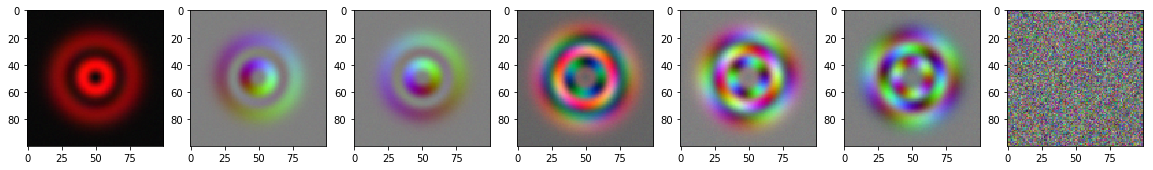

In [114]:
data_dir = os.path.join('data', 'simulated_m+1+2_and_m+1+4')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=7, output_shape=(100, 100))
fig, axs = plt.subplots(ncols=7, figsize=(20, 20))
for idx, component in enumerate(pca.components_):
    img = component.reshape((100, 100, 3))
    img = utils.rescale_array_values(img, [0, 1])
    axs[idx].imshow(img)

[58.80247996 43.65470087 41.39387928  2.48112403  2.4511482   2.42188457
  2.41714839  2.39850094  2.39226038  2.3811272 ]


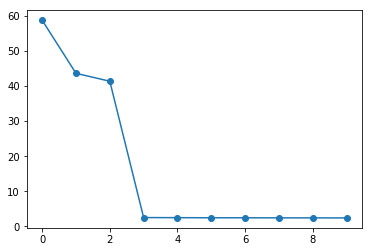

In [117]:
tuples_to_generate = [(1, (1, 1))]
# tuples_to_generate += [(1, (1, 4))]
data_dir = os.path.join('data', 'simulated_m+1+1_only')
data_files_utils.generate_VVB_superpositions_dataset(
    pars_to_generate=tuples_to_generate, num_samples_per_class=100, noise_level=0.1,
    data_dir=data_dir, output_shape=(100, 100),
    X=X, Y=Y, w0=reference_w0, polarization_state='uniform random')

data_dir = os.path.join('data', 'simulated_m+1+1_only')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=10, output_shape=(100, 100))
print(pca.singular_values_)
plt.plot(pca.singular_values_, 'o-');

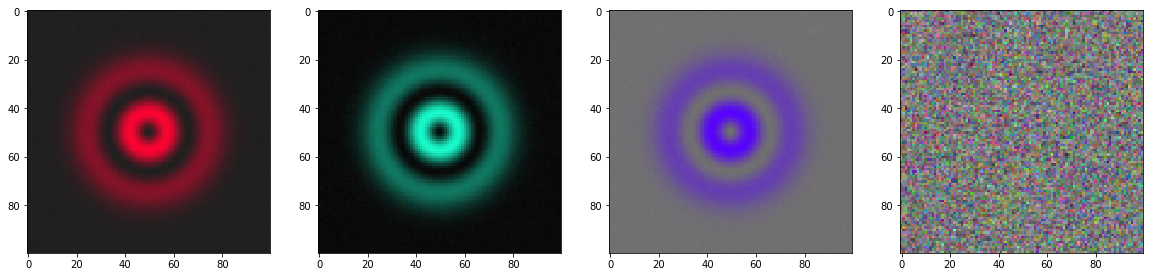

In [119]:
data_dir = os.path.join('data', 'simulated_m+1+1_only')
pca = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=4, output_shape=(100, 100))
fig, axs = plt.subplots(ncols=4, figsize=(20, 20))
for idx, component in enumerate(pca.components_):
    img = component.reshape((100, 100, 3))
    img = utils.rescale_array_values(img, [0, 1])
    axs[idx].imshow(img)

## Other stuff?

In [413]:
data_dir = os.path.join('data', 'simulated_noise0.1_onlyphi_bigdataset')
print('---- Training PCA'); time.sleep(0.2)
trained_pca = train_pca_on_files_in_dir(data_dir, n_components=11, monitor=True)
print('---- Load and reduce images'); time.sleep(0.2)
reduced_images = load_and_reduce_images_in_dir(data_dir, trained_pca, monitor=True)
training_labels = generate_labels_array_from_dir(data_dir)  # load labels

svc = sklearn.svm.SVC(kernel='rbf', gamma='auto')
svc.fit(reduced_images, training_labels)

np.count_nonzero(svc.predict(reduced_images) == training_labels) / training_labels.shape[0]

100% (8 of 8) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (8 of 8) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01


1.0

In [399]:
data_dir = os.path.join('data', 'simulated_noise0.1_onlyphi_bigdataset')
trained_pca = train_pca_on_files_in_dir(data_dir, n_components=80, monitor=True)

100% (8 of 8) |##########################| Elapsed Time: 0:00:02 Time:  0:00:02


In [454]:
foo1 = VVB.LaguerreGauss(X, Y, p=1, m=1, w0=reference_w0)
foo2 = VVB.LaguerreGauss(X, Y, p=1, m=2, w0=reference_w0)
np.vdot(foo1, foo2)

(1.2874900798265365e-17+2.0383000842727483e-16j)

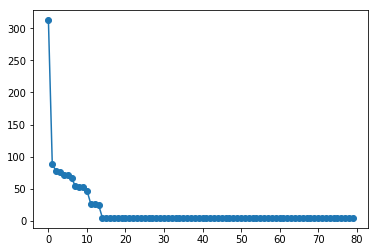

In [401]:
plt.plot(trained_pca.singular_values_, 'o-')

In [402]:
np.count_nonzero(svc.predict(reduced_images) == training_labels) / training_labels.shape[0]

0.9180555555555555

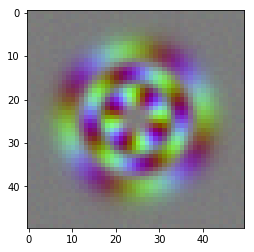

In [345]:
# see principal components as images
plt.imshow(utils.rescale_array_values(trained_pca.components_[4].reshape((50, 50, 3)), [0, 1]))

In [240]:
np.all(dataset.svc.predict(dataset.reduced_dataset) == np.array(dataset.labels))

True

# Load and classify experimental data

## Check accuracy of SVC on reduced space, using all the images for training

Load data and train PCA to find principal components

In [140]:
# data_dir = './data/experimental/26classes/'
# exp_pca_100pixels = data_files_utils.train_pca_on_files_in_dir(data_dir, n_components=10, output_shape=(100, 100),
#                                                                monitor='progressbar')

100% (26 of 26) |########################| Elapsed Time: 0:03:00 Time:  0:03:00


Load trained PCA and SVM

In [361]:
# import pickle
# with open('trained_ipca_exp26classes.pickle', 'wb') as fp:
#     pickle.dump(ipca, fp)
# with open('trained_svc_exp26classes_100x100pixels.pickle', 'wb') as fp:
#     pickle.dump(svc, fp)
with open('trained_ipca_exp26classes_100x100pixels.pickle', 'rb') as fp:
    exp_pca_100pixels_full = pickle.load(fp)
with open('trained_svc_exp26classes_100x100pixels.pickle', 'rb') as fp:
    exp_svc_100pixels_full = pickle.load(fp)

with open('trained_ipca_exp26classes_50x50pixels.pickle', 'rb') as fp:
    exp_pca_50pixels_full = pickle.load(fp)

In [355]:
pca = exp_pca_100pixels_full
data_dir = os.path.join('data', 'experimental', '26classes')
pixel_width = int(np.sqrt(pca.components_[0].shape[0] // 3))  # assumes NxNx3 pixels
reduced_images = data_files_utils.load_and_reduce_images_in_dir(
    data_dir=data_dir, reducer=pca, output_shape=(pixel_width, pixel_width),
    return_classes=True, monitor='progressbar'
)
merged_data, train_labels = utils.dict_of_arrays_to_labeled_array(reduced_images)
svc = sklearn.svm.SVC(kernel='rbf', gamma='auto')
svc.fit(merged_data, train_labels)

100% (26 of 26) |########################| Elapsed Time: 0:02:53 Time:  0:02:53


Check how well the images are classified:

In [258]:
np.all(train_labels == svc.predict(merged_data))

True

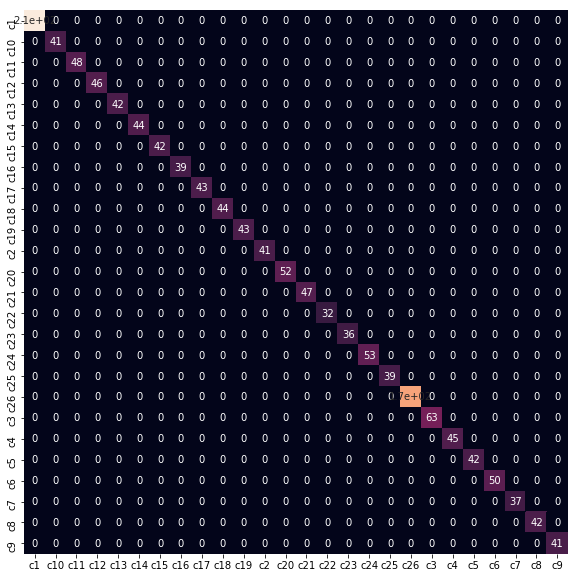

In [267]:
predicted_features = VVB.accuracies_from_predictions(
    true_labels=train_labels.astype(np.int),
    predicted_labels=svc.predict(merged_data).astype(np.int),
    labels_names=list(reduced_images.keys()))

_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(
    data=list(predicted_features.values()), ax=ax,
    annot=True, square=True, cbar=False,
    xticklabels=predicted_features.keys(), yticklabels=predicted_features.keys()
);

In [392]:
data_dir_train = os.path.join('data', 'experimental', '26classes_split', 'train')
foo_train_imgs = data_files_utils.load_images_in_dir(data_dir_train, output_shape=(50, 50), monitor=True)

data_dir_test = os.path.join('data', 'experimental', '26classes_split', 'test')
foo_test_imgs = data_files_utils.load_images_in_dir(data_dir_test, output_shape=(50, 50), monitor=True)

100% (718 of 718) |######################| Elapsed Time: 0:02:58 Time:  0:02:58
100% (719 of 719) |######################| Elapsed Time: 0:02:40 Time:  0:02:40


In [397]:
pca = exp_pca_50pixels_full
data_dir_train = os.path.join('data', 'experimental', '26classes_split', 'train')
pixel_width = int(np.sqrt(pca.components_[0].shape[0] // 3))  # assumes NxNx3 pixels
reduced_images = data_files_utils.load_and_reduce_images_in_dir(
    data_dir=data_dir_train, reducer=pca, output_shape=(pixel_width, pixel_width),
    return_classes=True, monitor='progressbar'
)
merged_data, train_labels = utils.dict_of_arrays_to_labeled_array(reduced_images)
svc = sklearn.svm.SVC(kernel='rbf', gamma='auto')
svc.fit(merged_data, train_labels)

100% (26 of 26) |########################| Elapsed Time: 0:02:32 Time:  0:02:32


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

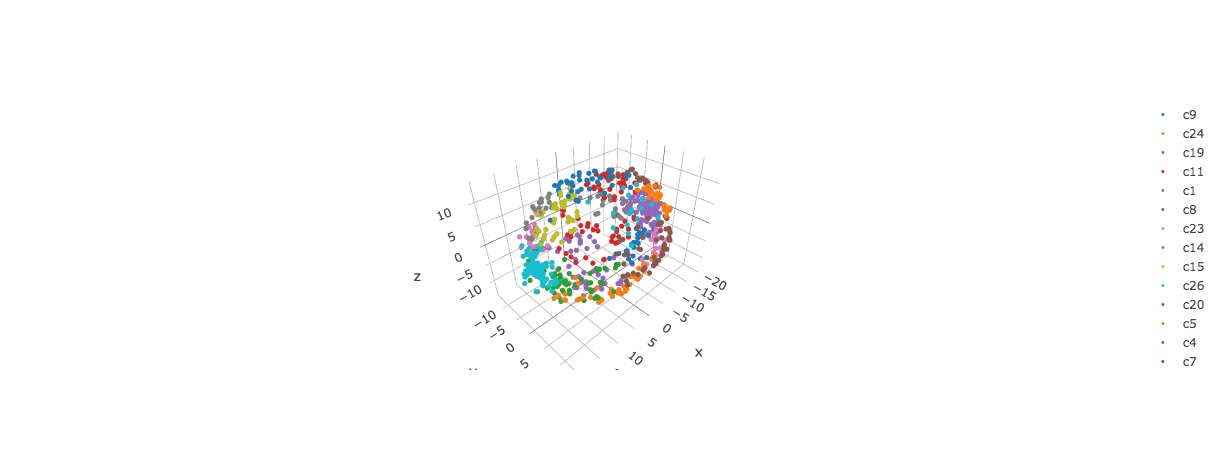

In [398]:
traces = []
for dir_, data in reduced_images.items():
    traces.append(go.Scatter3d(
        x=data[:, 0], y=data[:, 1], z=data[:, 2],
        mode='markers', marker=dict(size=3), name=dir_))
plotly.offline.iplot(traces)

## Check accuracy of SVC on reduced space, using half of the given images

Use the following to split the dataset used above into two subsets. The new `train` set of images is built by randomly sampling half of the original images. The `test` set is the rest of the images (*don't run if you don't know what you are doing*).

In [ ]:
# data_dir = os.path.join('data', 'experimental', '26classes')
# out_data_dir = os.path.join('data', 'experimental', '26classes_split')
# np.random.seed(0)
# data_files_utils.ImageDataFolder(data_dir).split_into_train_and_test_dirs(new_root_path=out_data_dir, train_ratio=0.5)

Now load all the images in the `train` directory, reduce them to $50\times 50$ pixels, and train a PCA reducer on the resulting images. Save the result to file for future ease of use.

In [4]:
# data_dir = os.path.join('data', 'experimental', '26classes_split', 'train')
# exp_pca_50pixels_train = data_files_utils.train_pca_on_files_in_dir(
#     data_dir, n_components=5, output_shape=(50, 50), monitor='progressbar')

# with open('trained_ipca_exp26classes_50x50pixels_trainset.pickle', 'wb') as fp:
#     pickle.dump(exp_pca_50pixels_train, fp)
    
with open('trained_ipca_exp26classes_50x50pixels_trainset.pickle', 'rb') as fp:
    exp_pca_50pixels_train = pickle.load(fp)

Train an SVC classifier on the reduced images (this means that the classification is performed over $5$-dimensional vectors, as that is the number of reduced dimensions given by the PCA).
Again, save the result to file.

In [65]:
# data_dir = os.path.join('data', 'experimental', '26classes_split', 'train')

# pixel_width = int(np.sqrt(exp_pca_50pixels_train.components_[0].shape[0] // 3))  # assumes NxNx3 pixels
# reduced_train_images = data_files_utils.load_and_reduce_images_in_dir(
#     data_dir=data_dir, reducer=exp_pca_50pixels_train, output_shape=(pixel_width, pixel_width),
#     return_classes=True, monitor='progressbar'
# )
# merged_train_data, train_labels = utils.dict_of_arrays_to_labeled_array(reduced_train_images)

# exp_svc_50pixels_train = sklearn.svm.SVC(kernel='rbf', gamma='auto')
# exp_svc_50pixels_train.fit(merged_train_data, train_labels)
# with open('trained_svc_exp26classes_50x50pixels_trainset.pickle', 'wb') as fp:
#     pickle.dump(exp_svc_50pixels_train, fp)

# exp_svc_50pixels_3dims_train = sklearn.svm.SVC(kernel='rbf', gamma='auto')
# exp_svc_50pixels_3dims_train.fit(merged_train_data[:, :3], train_labels)
# with open('trained_svc_exp26classes_50x50pixels_3dims_trainset.pickle', 'wb') as fp:
#     pickle.dump(exp_svc_50pixels_3dims_train, fp)


    
with open('trained_svc_exp26classes_50x50pixels_trainset.pickle', 'rb') as fp:
    exp_svc_50pixels_train = pickle.load(fp)

with open('trained_svc_exp26classes_50x50pixels_3dims_trainset.pickle', 'rb') as fp:
    exp_svc_50pixels_3dims_train = pickle.load(fp)

Load both the `train` and `test` datasets

In [61]:
# load images in train folder and compute the reduced representation
data_dir_train = os.path.join('data', 'experimental', '26classes_split', 'train')
pixel_width = int(np.sqrt(exp_pca_50pixels_train.components_[0].shape[0] // 3))  # assume NxNx3 pixels
reduced_train_images = data_files_utils.load_and_reduce_images_in_dir(
    data_dir=data_dir_train, reducer=exp_pca_50pixels_train, output_shape=(pixel_width, pixel_width),
    return_classes=True, monitor='progressbar'
)
merged_train_data, train_labels = utils.dict_of_arrays_to_labeled_array(reduced_train_images)

# load images in test folder and compute the reduced representation
data_dir_test = os.path.join('data', 'experimental', '26classes_split', 'test')
reduced_test_images = data_files_utils.load_and_reduce_images_in_dir(
    data_dir=data_dir_test, reducer=exp_pca_50pixels_train, output_shape=(pixel_width, pixel_width),
    return_classes=True, monitor='progressbar'
)
merged_test_data, test_labels = utils.dict_of_arrays_to_labeled_array(reduced_test_images)

100% (26 of 26) |########################| Elapsed Time: 0:02:28 Time:  0:02:28
100% (26 of 26) |########################| Elapsed Time: 0:02:29 Time:  0:02:29


Show the reduced 3D representation (reduced using the PCA trained on the `train` dataset) of the `test` dataset. We color in green the points that are correctly classified by the SVC (trained on the `train` dataset only, and in red those that are incorrectly classified.

We show this both when using the SVC trained on the data reduced in *three* dimensions, and for the SVC trained on data reduced to *five* dimensions. Reducing to three dimensions here seems to give significantly better results.

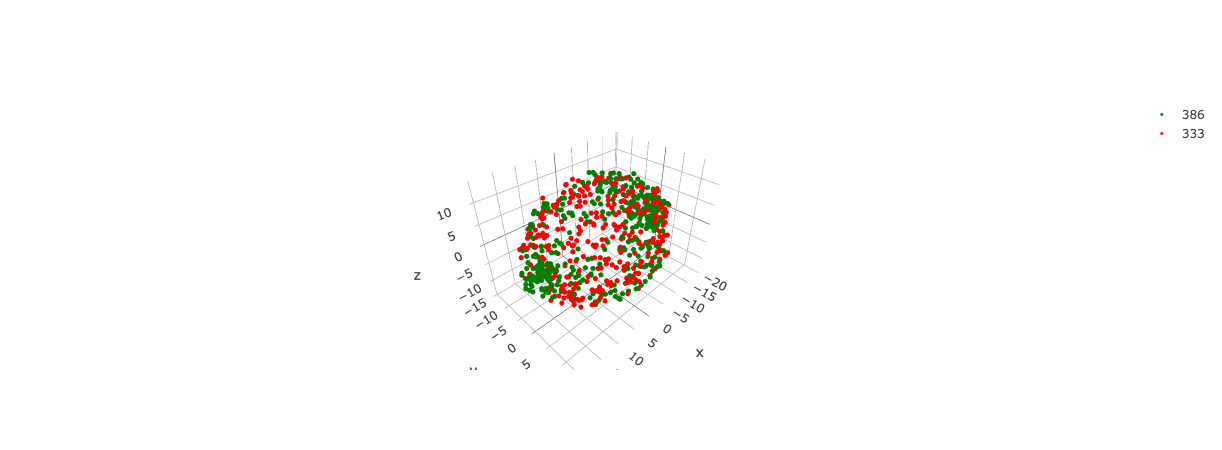

In [101]:
def _():
    pts = merged_test_data
    predicted_labels = exp_svc_50pixels_train.predict(pts).astype(np.int)
    labels = test_labels.astype(np.int)
    good_pts = pts[np.where(predicted_labels == labels)]
    bad_pts = pts[np.where(predicted_labels != labels)]
    traces = []
    traces.append(go.Scatter3d(
        x=good_pts[:, 0], y=good_pts[:, 1], z=good_pts[:, 2],
        mode='markers', marker=dict(size=3, color='green'), name=str(len(good_pts))))
    traces.append(go.Scatter3d(
        x=bad_pts[:, 0], y=bad_pts[:, 1], z=bad_pts[:, 2],
        mode='markers', marker=dict(size=3, color='red'), name=str(len(bad_pts))))
    plotly.offline.iplot(traces)
_()

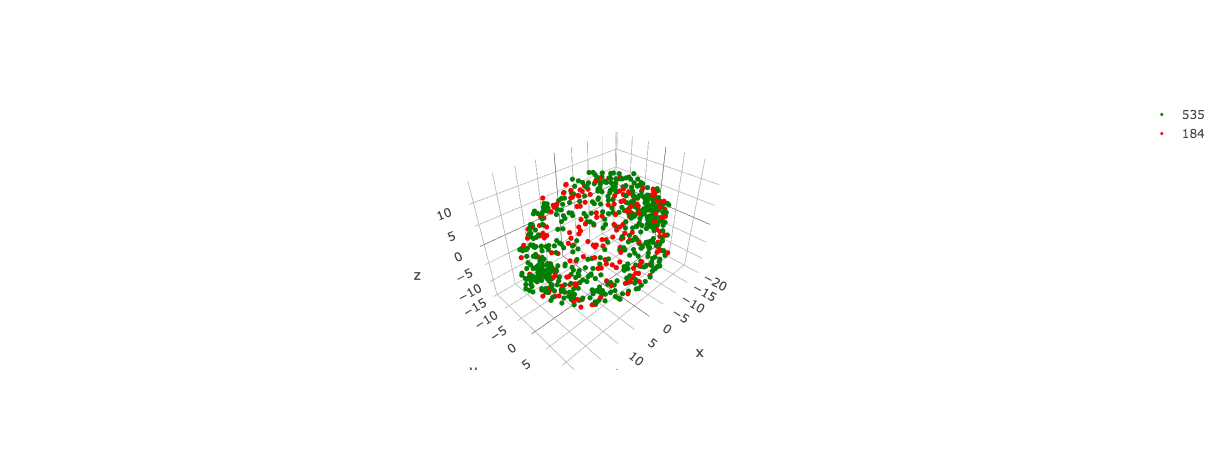

In [102]:
def _():
    pts = merged_test_data[:, :3]
    predicted_labels = exp_svc_50pixels_3dims_train.predict(pts).astype(np.int)
    labels = test_labels.astype(np.int)
    good_pts = pts[np.where(predicted_labels == labels)]
    bad_pts = pts[np.where(predicted_labels != labels)]
    traces = []
    traces.append(go.Scatter3d(
        x=good_pts[:, 0], y=good_pts[:, 1], z=good_pts[:, 2],
        mode='markers', marker=dict(size=3, color='green'), name=str(len(good_pts))))
    traces.append(go.Scatter3d(
        x=bad_pts[:, 0], y=bad_pts[:, 1], z=bad_pts[:, 2],
        mode='markers', marker=dict(size=3, color='red'), name=str(len(bad_pts))))
    plotly.offline.iplot(traces)
_()

As also shown in the above images with green and red points, training the SVC classifier over the training set does not generalise well to the test set. Interestingly, the results improve significantly (while still being pretty bad) if the classifier if trained over only three dimensions, instead of five like in the first case.

This indicates that the SVC is mostly overfitting the data, and not picking up the real pattern. This can be understood as a natural consequence of the fact that the classes do not have a clearly marked separation between them, so that there can be (and there are) points very close to the boundaries between classes.

The fact that training over three dimensions is better than over five is further evidence towards the fact that only the first three dimensions carry significant information about the state.

In [89]:
print('Train accuracy: {}'.format(
    np.count_nonzero(train_labels == exp_svc_50pixels_train.predict(merged_train_data)) / train_labels.shape[0]))
print('Test accuracy: {}'.format(
    np.count_nonzero(test_labels == exp_svc_50pixels_train.predict(merged_test_data)) / test_labels.shape[0]))

Train accuracy: 0.9916434540389972
Test accuracy: 0.5368567454798331


In [88]:
print('Train accuracy: {}'.format(
    np.count_nonzero(train_labels == exp_svc_50pixels_3dims_train.predict(merged_train_data[:, :3])) / train_labels.shape[0]))
print('Test accuracy: {}'.format(
    np.count_nonzero(test_labels == exp_svc_50pixels_3dims_train.predict(merged_test_data[:, :3])) / test_labels.shape[0]))

Train accuracy: 0.9693593314763231
Test accuracy: 0.7440890125173852


Fraction of correctly predicted label, for each true label, for the `train` dataset (the same one used to train the classifier):

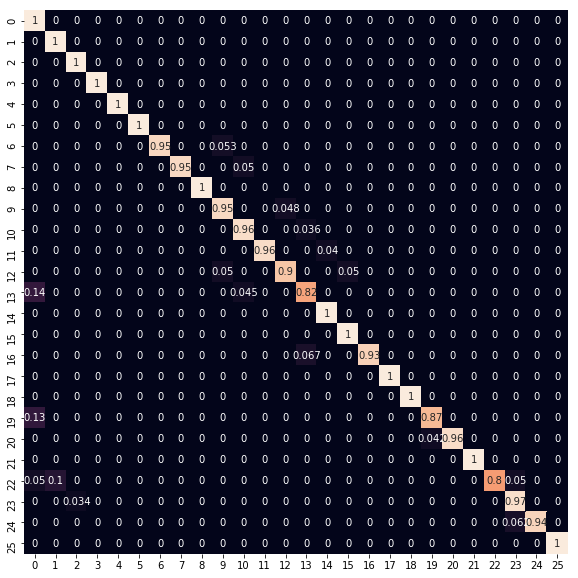

In [128]:
def _():
    svc = exp_svc_50pixels_3dims_train
    
    merged_data = merged_train_data
    labels = train_labels.astype(np.int)
    predicted_labels = svc.predict(merged_train_data[:, :3])

    predicted_features = utils.compute_accuracies_per_label(
        true_labels=labels,
        predicted_labels=predicted_labels
    )

    _, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.heatmap(
        data=list(predicted_features.values()), ax=ax,
        annot=True, square=True, cbar=False,
        xticklabels=predicted_features.keys(), yticklabels=predicted_features.keys()
    );

_()

Fraction of correctly predicted label, for each true label, for the `test` dataset (*not* the same one used to train the classifier):

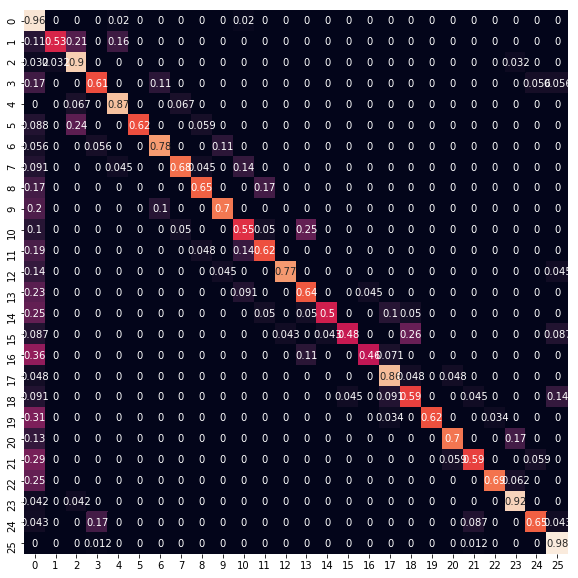

In [126]:
def _():
    svc = exp_svc_50pixels_3dims_train
    
    merged_data = merged_test_data
    labels = test_labels.astype(np.int)
    predicted_labels = svc.predict(merged_test_data[:, :3])

    predicted_features = utils.compute_accuracies_per_label(
        true_labels=labels,
        predicted_labels=predicted_labels
    )

    _, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.heatmap(
        data=list(predicted_features.values()), ax=ax,
        annot=True, square=True, cbar=False,
        xticklabels=predicted_features.keys(), yticklabels=predicted_features.keys()
    );

_()

## Direct regression using principal components

In [ ]:
pca = exp_pca_100pixels_full
data_dir = os.path.join('data', 'experimental', '26classes')
pixel_width = int(np.sqrt(pca.components_[0].shape[0] // 3))  # assumes NxNx3 pixels
reduced_images = data_files_utils.load_and_reduce_images_in_dir(
    data_dir=data_dir, reducer=pca, output_shape=(pixel_width, pixel_width),
    return_classes=True, monitor='progressbar'
)
merged_data, train_labels = utils.dict_of_arrays_to_labeled_array(reduced_images)

In [213]:
with open('trained_ipca_exp26classes_100x100pixels.pickle', 'rb') as fp:
    exp_pca_100pixels_full = pickle.load(fp)

exp_26classes_fulldataset = data_files_utils.ImagesDatasetToReduce(
    data_dir=os.path.join('data', 'experimental', '26classes'),
    pca=exp_pca_100pixels_full
)

100% (26 of 26) |########################| Elapsed Time: 0:02:54 Time:  0:02:54


In [225]:
exp_26classes_fulldataset.merged_data[:, :3].shape
foo = np.concatenate((
    np.asarray(exp_26classes_fulldataset.filenames)[:, None],
    exp_26classes_fulldataset.merged_data[:, :3]
), axis=1)

In [227]:
np.savetxt(fname='points_and_paths.txt', X=foo, fmt="%s")

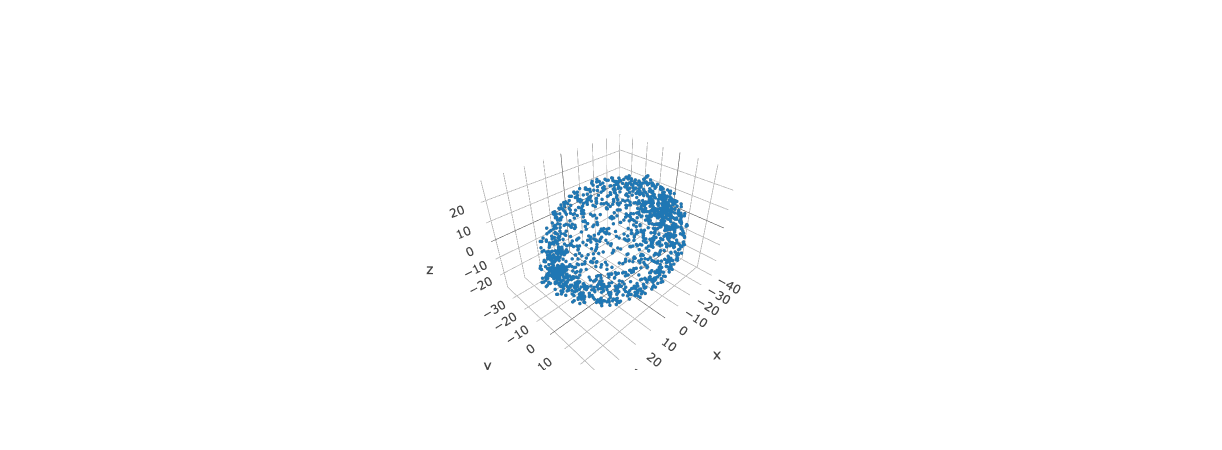

In [239]:
pts = exp_26classes_fulldataset.merged_data[:, :3]
pca = exp_26classes_fulldataset.pca
more_pts = pca.transform(pca.components_[:3])[:, :3]

traces = []
traces.append(go.Scatter3d(
    x=pts[:, 0], y=pts[:, 1], z=pts[:, 2],
    mode='markers', marker=dict(size=2), name=str(len(pts))))
plotly.offline.iplot(traces)

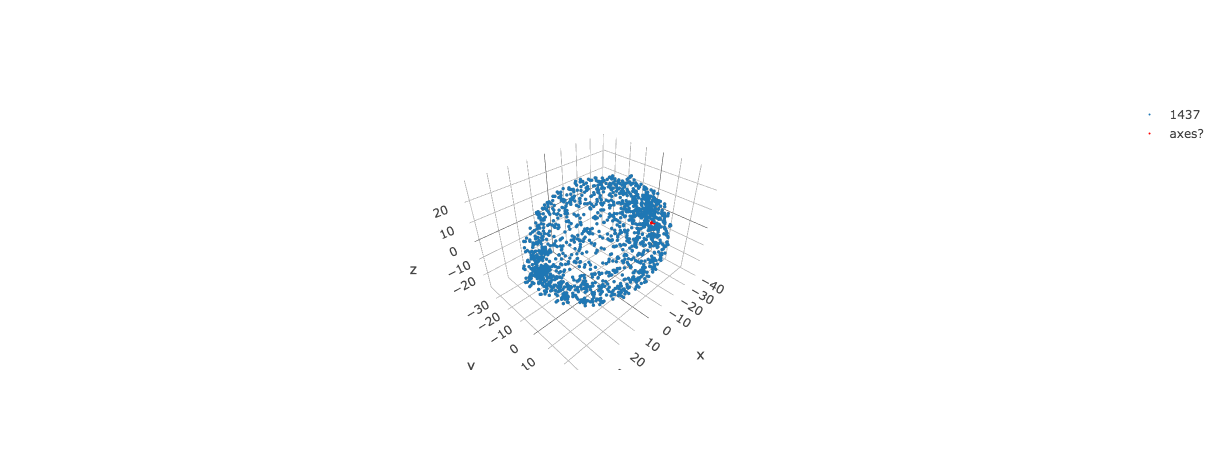

In [174]:
pts = exp_26classes_fulldataset.merged_data[:, :3]
pca = exp_26classes_fulldataset.pca
more_pts = pca.transform(pca.components_[:3])[:, :3]

traces = []
traces.append(go.Scatter3d(
    x=pts[:, 0], y=pts[:, 1], z=pts[:, 2],
    mode='markers', marker=dict(size=2), name=str(len(pts))))
traces.append(go.Scatter3d(
    x=more_pts[:, 0], y=more_pts[:, 1], z=more_pts[:, 2],
    mode='markers', marker=dict(size=2, color='red'), name='axes?'))
plotly.offline.iplot(traces)

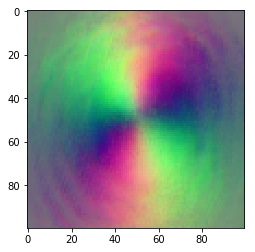

In [212]:
foo = np.zeros(10)
foo[1] = 30.
plt.imshow(
    utils.rescale_array_values(
        pca.inverse_transform(foo).reshape((100, 100, 3)),
        [0, 1]
    )
)

In [192]:
foo = np.zeros(10)
foo[0] = 1.
pca.transform(pca.inverse_transform(foo)[None, :])

array([[ 1.00000000e+00, -3.37119113e-19,  1.06116288e-17,
        -2.77826807e-17,  3.53992009e-17, -3.83807569e-17,
         1.10230835e-15, -5.23344389e-16, -3.38271078e-17,
         1.31405303e-16]])

In [181]:
merged_test_data

(719, 5)

In [154]:
exp_pca_100pixels_full.transform(exp_pca_100pixels_full.components_[:3]).shape

(3, 10)

In [173]:
np.dot(pca.components_[:3], pca.components_.T)[:, :3]

array([[ 1.00000000e+00, -5.63785130e-18,  1.04625510e-17],
       [-5.63785130e-18,  1.00000000e+00,  2.45910605e-16],
       [ 1.04625510e-17,  2.45910605e-16,  1.00000000e+00]])

In [163]:
exp_pca_100pixels_full.components_.shape

(10, 30000)

## Other sections

Reload trained PCA and SVC classifier from file:

In [151]:
with open('trained_ipca_exp26classes_100x100pixels.pickle', 'rb') as fp:
    trained_pca = pickle.load(fp)
with open('trained_svc_exp26classes.pickle', 'rb') as fp:
    trained_svc = pickle.load(fp)

/adsusers/40168729/miniconda3/envs/keras/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning:

Trying to unpickle estimator SVC from version 0.19.0 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.



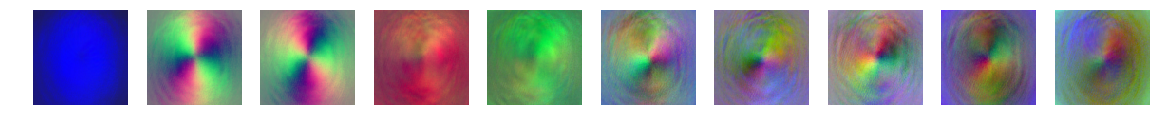

In [153]:
def _():
    pca = trained_pca
    fig, axs = plt.subplots(ncols=len(pca.components_), figsize=(20, 20))
    pixel_width = int(np.sqrt(pca.components_[0].shape[0] // 3))  # assumes NxNx3 pixels
    minmax = [pca.components_.min(), pca.components_.max()]
    for idx, principal_component in enumerate(pca.components_):
        image_arr = principal_component.reshape((pixel_width, pixel_width, 3))
        image_arr = utils.rescale_array_values(image_arr, [0, 1], old_range=minmax)
        axs[idx].imshow(image_arr)
        axs[idx].axis('off')
_()

In [160]:
np.savetxt('arr_for_MMA.txt', reduced_images[:, :3])

In [186]:
pca = trained_pca
data_dir = os.path.join('data', 'experimental', '26classes')
pixel_width = int(np.sqrt(pca.components_[0].shape[0] // 3))  # assumes NxNx3 pixels
reduced_images = data_files_utils.load_and_reduce_images_in_dir(
    data_dir=data_dir, reducer=pca, output_shape=(pixel_width, pixel_width),
    return_classes=True
)

Run the following to save to file the points in the reduced representation of the experimental images, together with the associated labels added as first element of each vector.

In [207]:
# def _():
#     merged_data = None
#     for idx, (class_, data) in enumerate(reduced_images.items()):
#         class_col = np.ones_like(data[:, -1]) * idx
#         new_data = np.concatenate((class_col[:, None], data[:, :3]), axis=1)
#         if merged_data is None:
#             merged_data = new_data
#         else:
#             merged_data = np.vstack((merged_data, new_data))
#     np.savetxt('reduced_points_with_classes.txt', merged_data)
# _()

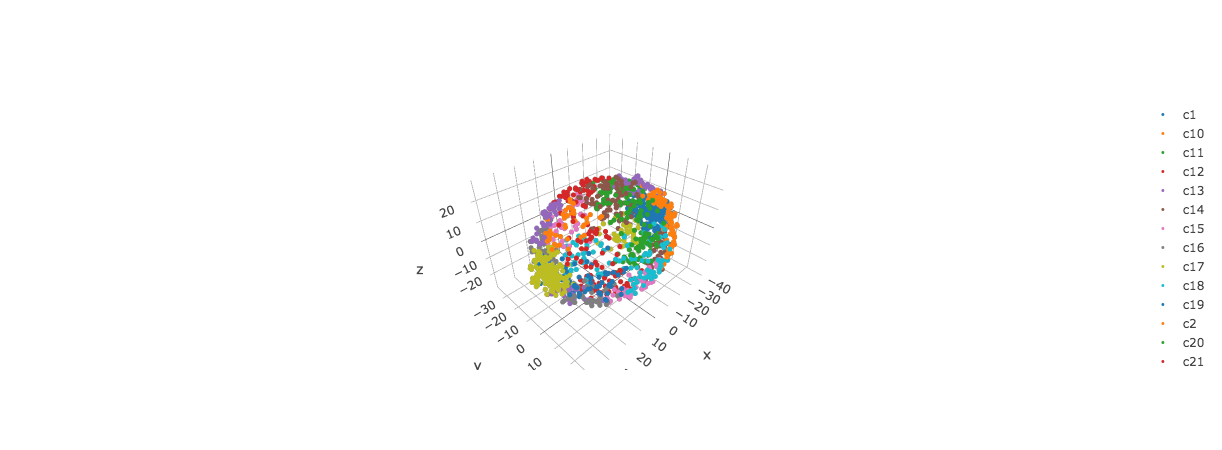

In [256]:
traces = []
for dir_, data in reduced_images.items():
    traces.append(go.Scatter3d(
        x=data[:, 0], y=data[:, 1], z=data[:, 2],
        mode='markers', marker=dict(size=3), name=dir_))
plotly.offline.iplot(traces)

In the above we can see a point that does not seem to fit in the Bloch sphere like all the other points (the point in the `c15` class which has $y<-36$). This point corresponds to the image `c15_ (10).jpeg`, and looking at the image it's obvious why the point does not appear to be a physical point in this picture:

array([[  3.54030976, -36.50353049,  -8.47533256]])

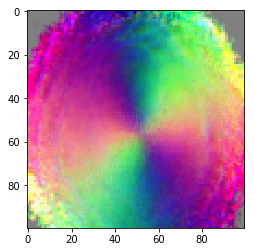

In [255]:
image = data_files_utils.load_resize_and_flatten_rgb_image(
            filename=os.path.join('data', 'experimental', '26classes', 'c15', 'c15_ (10).jpeg'),
            output_shape=(100, 100))
plt.imshow(image.reshape((100, 100, 3)))  # show image
trained_pca.transform(image[None, :])[:, :3]  # print reduced 3d representation. Note the second element

# Taira stuff

In [15]:
#projectors for stokes measurements


sV_op = np.dot(rotated_HWP_matrix(45), rotated_QWP_matrix(0))
sH_op = np.dot(rotated_HWP_matrix(0), rotated_QWP_matrix(0))
sD_op = np.dot(rotated_HWP_matrix(22.5), rotated_QWP_matrix(45))
sA_op = np.dot(rotated_HWP_matrix(-22.5), rotated_QWP_matrix(45))
sL_op = np.dot(rotated_HWP_matrix(22.5), rotated_QWP_matrix(0))
sR_op = np.dot(rotated_HWP_matrix(-22.5), rotated_QWP_matrix(0))

# #polarization states
# L = [1, -1j] / np.sqrt(2)
# R = [1, 1j] / np.sqrt(2)
# D = [1, 1] / np.sqrt(2)
# A = [1, -1] / np.sqrt(2)
# H = np.array([1, 0])
# V = np.array([0, 1])


def pol_state(state1, state2, beta, alpha): 
    return np.array([
        np.cos(np.radians(alpha / 2)) * state1,
        np.exp(1j * np.radians(beta)) * np.sin(np.radians(alpha / 2)) * state2
    ])


def rotate_state(rotation_matrix, state):
    return np.dot(rotation_matrix, np.transpose(state))


def vec_vortex(coeff,x,y,p,m1,m2,w0):
    return np.round(coeff[0],6)*LG(x,y,p,m2,w0)+np.round(coeff[1],6)*LG(x,y,p,m1,w0)


def stokes_para(Iv,Ih):
    return Ih - Iv

In [ ]:
#VVB generation with LG
w0=150
m1=-5
m2=1
beta=0
alpha=90

v_mes = measurement(sV_op, pol_state(L, R, beta, alpha))[0]
h_mes = measurement(sH_op, pol_state(L, R, beta, alpha))[0]
d_mes = measurement(sD_op, pol_state(L, R, beta, alpha))[0]
a_mes = measurement(sA_op, pol_state(L, R, beta, alpha))[0]
l_mes = measurement(sL_op, pol_state(L, R, beta, alpha))[0]
r_mes = measurement(sR_op, pol_state(L, R, beta, alpha))[0]

v_vortex = vec_vortex(v_mes, X, Y, 0, m1, m2, w0)
h_vortex = vec_vortex(h_mes, X, Y, 0, m1, m2, w0)
d_vortex = vec_vortex(d_mes, X, Y, 0, m1, m2, w0)
a_vortex = vec_vortex(a_mes, X, Y, 0, m1, m2, w0)
l_vortex = vec_vortex(l_mes, X, Y, 0, m1, m2, w0)
r_vortex = vec_vortex(r_mes, X, Y, 0, m1, m2, w0)

Iv = np.abs(np.transpose(v_vortex))**2
Ih = np.abs(np.transpose(h_vortex))**2
Id = np.abs(np.transpose(d_vortex))**2
Ia = np.abs(np.transpose(a_vortex))**2
Il = np.abs(np.transpose(l_vortex))**2
Ir = np.abs(np.transpose(r_vortex))**2


s1 = stokes_para(Ih, Iv)
s2 = stokes_para(Id, Ia)
s3 = stokes_para(Il, Ir)
s_vector = np.dstack((s1, s2, s3))

In [ ]:
#Checking beam shapes on each polarization basis
fig, axs = plt.subplots(nrows=1, ncols=6)
beams = [Ih, Iv, Id, Ia, Il, Ir]
bases = ['H', 'V', 'D', 'A', 'L', 'R']
c=0
for ax, beam, label in zip(axs, beams, bases):
    ax.imshow(beam, interpolation='nearest', cmap='inferno')
    ax.axis('off')
    ax.set_title(label)

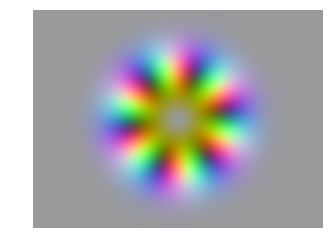

In [ ]:
#Polarization patterns econding in RGB colors

stokes=s_vector+np.abs(np.min(s_vector))
#la formula qui sopra mi serve perchè i parametri di Stokes possono essere negativi
#e nella conversione in un colore RGB dà fastidio.
#Quello che faccio è traslare il centro della sfera di Bloch da (0,0,0) a (1,1,1)
#Con le immagini teoriche ho problemi a calcolarmi i parametri di Stokes normalizzati (esplode
#quando deve fare 0/0), infatti la funzione stokes-para non ha il denominatore, e per
#questo traslo di np.abs(np.min(s_vector)) e non di 1 come faccio durante le acquisizioni
#dall'apparato (lì la camera ha un fondo !=0 e non capita mai una divisione 0/0 e 
#riesco ad ottenere i parametri normalizzati). Quesa cosa comunque funziona molto bene, 
#tranne che in prossimità
#dei poli in cui questo codice va un po' adattato ai casi.


rescaled=(256/(np.max(stokes))*(stokes)).astype(np.uint8)

plt.imshow(rescaled,interpolation='nearest')
plt.axis('off')
plt.show()